In [2]:
from sqlalchemy import create_engine
import pandas as pd
import atoti as tt
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to Atoti 0.9.4!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [3]:
from sqlalchemy import create_engine

In [4]:
df = pd.read_csv("global_power_plant_database.csv", low_memory=False)

In [5]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [7]:
df.isnull().any()

country                           False
country_long                      False
name                              False
gppd_idnr                         False
capacity_mw                       False
latitude                          False
longitude                         False
primary_fuel                      False
other_fuel1                        True
other_fuel2                        True
other_fuel3                        True
commissioning_year                 True
owner                              True
source                             True
url                                True
geolocation_source                 True
wepp_id                            True
year_of_capacity_data              True
generation_gwh_2013                True
generation_gwh_2014                True
generation_gwh_2015                True
generation_gwh_2016                True
generation_gwh_2017                True
generation_gwh_2018                True
generation_gwh_2019                True


In [8]:
# Check for duplicates based on all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

# Count the number of duplicate rows
num_duplicates = len(duplicates)
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh_2013, estimated_generation_gwh_2014, estimated_generation_gwh_2015, estimated_generation_gwh_2016, estimated_generation_gwh_2017, estimated_generation_note_2013, estimated_generation_note_2014, estimated_generation_note_2015, estimated_generation_note_2016, estimated_generation_note_2017]
Index: []

[0 rows x 36 columns]

Number of duplicate rows: 0


In [9]:
df["other_fuel1"].fillna(df["other_fuel1"].mode()[0], inplace=True)
df["other_fuel2"].fillna(df["other_fuel2"].mode()[0], inplace=True)
df["other_fuel3"].fillna(df["other_fuel3"].mode()[0], inplace=True)

C:\Users\widya louisa\AppData\Local\Temp\ipykernel_23100\779911997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["other_fuel1"].fillna(df["other_fuel1"].mode()[0], inplace=True)
C:\Users\widya louisa\AppData\Local\Temp\ipykernel_23100\779911997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [10]:
cols = [
    "estimated_generation_gwh_2013", "estimated_generation_gwh_2014",
    "estimated_generation_gwh_2015", "estimated_generation_gwh_2016",
    "estimated_generation_gwh_2017"]
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
# Cek apakah masih ada NaN
print(df.isnull().sum())

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                           0
other_fuel2                           0
other_fuel3                           0
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [12]:
# Ubah kolom menjadi datetime (hanya tahun)
df["commissioning_year"] = pd.to_datetime(df["commissioning_year"], format="%Y", errors="coerce")
df["year_of_capacity_data"] = pd.to_datetime(df["year_of_capacity_data"], format="%Y", errors="coerce")

In [13]:
df["capacity_gw"] = df["capacity_mw"] / 1000 
df["capacity_tw"] = df["capacity_mw"] / 1_000_000

In [14]:
df["capacity_gw"] = df["capacity_gw"].astype(float)
df["capacity_tw"] = df["capacity_tw"].astype(float)
df["capacity_mw"] = df["capacity_mw"].astype(float)

## Memulai sesi atoti dan mengimpor data frame ke Session atoti

In [15]:
session = tt.Session.start()

In [16]:
df1=df[["country_long", "name", "gppd_idnr","capacity_mw", "primary_fuel", "country",
        "estimated_generation_gwh_2013", "estimated_generation_gwh_2014", "estimated_generation_gwh_2015",
       "estimated_generation_gwh_2016","estimated_generation_gwh_2017","other_fuel1","other_fuel2",
        "other_fuel3","latitude","longitude","capacity_gw","capacity_tw"]]

In [17]:
# 1. Dimensi Pembangkit Listrik
dim_name = df1[["gppd_idnr", "name","latitude","longitude"]].drop_duplicates()
dim_name_table = session.read_pandas(dim_name, table_name="Dim_PowerPlant", keys=["gppd_idnr"])

In [18]:
dim_country = df1[["country_long","country"]].drop_duplicates().reset_index(drop=True)
dim_country["id_country"] = dim_country.index + 1
dim_country_table = session.read_pandas(dim_country, table_name="Dim_Country", keys=["id_country"])

In [19]:
dim_fuel = df1[["primary_fuel","other_fuel1","other_fuel2","other_fuel3"]].drop_duplicates().reset_index(drop=True)
dim_fuel["id_fuel"] = dim_fuel.index + 1
dim_fuel_table = session.read_pandas(dim_fuel, table_name="Dim_Fuel", keys=["id_fuel"])

In [20]:
# Gabung ID Country
fact_df = df1.merge(dim_country, on="country_long", how="left")

# Gabung ID Fuel
fact_df = fact_df.merge(dim_fuel, on="primary_fuel", how="left")

# Buat tabel fakta dengan hanya ID dan metrik numerik
fact_generation = fact_df[["id_country", "id_fuel", "gppd_idnr", "capacity_mw", "country_long", "primary_fuel",
                           "name","estimated_generation_gwh_2013", "estimated_generation_gwh_2014",
                           "estimated_generation_gwh_2015", "estimated_generation_gwh_2016",
                           "estimated_generation_gwh_2017","capacity_gw","capacity_tw"]]

In [21]:
fact_table = session.read_pandas(fact_generation,
                                    table_name='Fact_Power_Generation',
                                    data_types={
                                        'id_country': tt.type.INT,
                                        'id_fuel': tt.type.INT,
                                        'gppd_idnr': tt.type.STRING,
                                        'country_long': tt.type.STRING,
                                        'primary_fuel': tt.type.STRING,
                                        'name': tt.type.STRING,
                                        'capacity_mw': tt.type.FLOAT,
                                        'estimated_generation_gwh_2013': tt.type.FLOAT,
                                        'estimated_generation_gwh_2014': tt.type.FLOAT,
                                        'estimated_generation_gwh_2015': tt.type.FLOAT,
                                        'estimated_generation_gwh_2016': tt.type.FLOAT,
                                        'estimated_generation_gwh_2017': tt.type.FLOAT,
                                        'capacity_gw': tt.type.FLOAT,
                                        'capacity_tw': tt.type.FLOAT},
                                    keys=["id_country", "id_fuel", "gppd_idnr"])

In [22]:
fact_table.join(dim_name_table)
fact_table.join(dim_country_table)
fact_table.join(dim_fuel_table)

In [23]:
session.tables.schema

```mermaid
erDiagram
  "Dim_PowerPlant" {
    _ String PK "gppd_idnr"
    _ String "name"
    nullable double "latitude"
    nullable double "longitude"
  }
  "Dim_Country" {
    _ String "country_long"
    _ String "country"
    _ long PK "id_country"
  }
  "Dim_Fuel" {
    _ String "primary_fuel"
    _ String "other_fuel1"
    _ String "other_fuel2"
    _ String "other_fuel3"
    _ long PK "id_fuel"
  }
  "Fact_Power_Generation" {
    _ long PK "id_country"
    _ long PK "id_fuel"
    _ String PK "gppd_idnr"
    nullable float "capacity_mw"
    _ String "country_long"
    _ String "primary_fuel"
    _ String "name"
    nullable float "estimated_generation_gwh_2013"
    nullable float "estimated_generation_gwh_2014"
    nullable float "estimated_generation_gwh_2015"
    nullable float "estimated_generation_gwh_2016"
    nullable float "estimated_generation_gwh_2017"
    nullable float "capacity_gw"
    nullable float "capacity_tw"
  }
  "Fact_Power_Generation" }o--o| "Dim_Country" : "`id_country` == `id_country`"
  "Fact_Power_Generation" }o--o| "Dim_Fuel" : "`id_fuel` == `id_fuel`"
  "Fact_Power_Generation" }o--o| "Dim_PowerPlant" : "`gppd_idnr` == `gppd_idnr`"
```


Cube and Measure

In [24]:
cube = session.create_cube(fact_table)
h = cube.hierarchies
l = cube.levels
m = cube.measures

In [25]:
h

{('Fact_Power_Generation', 'id_country'): <atoti.hierarchy.Hierarchy object at 0x00000217E3C0E7B0>, ('Fact_Power_Generation', 'gppd_idnr'): <atoti.hierarchy.Hierarchy object at 0x00000217E3CE5810>, ('Fact_Power_Generation', 'name'): <atoti.hierarchy.Hierarchy object at 0x00000217E3CE7ED0>, ('Fact_Power_Generation', 'primary_fuel'): <atoti.hierarchy.Hierarchy object at 0x00000217E352A190>, ('Fact_Power_Generation', 'id_fuel'): <atoti.hierarchy.Hierarchy object at 0x00000217E3529CD0>, ('Fact_Power_Generation', 'country_long'): <atoti.hierarchy.Hierarchy object at 0x00000217E3C03AD0>, ('Dim_PowerPlant', 'name'): <atoti.hierarchy.Hierarchy object at 0x00000217E34CB130>, ('Dim_Fuel', 'other_fuel2'): <atoti.hierarchy.Hierarchy object at 0x00000217E34CB790>, ('Dim_Fuel', 'other_fuel3'): <atoti.hierarchy.Hierarchy object at 0x00000217DFB31350>, ('Dim_Fuel', 'other_fuel1'): <atoti.hierarchy.Hierarchy object at 0x00000217DFB30D50>, ('Dim_Fuel', 'primary_fuel'): <atoti.hierarchy.Hierarchy object at 0x00000217E3CE14F0>, ('Dim_Country', 'country'): <atoti.hierarchy.Hierarchy object at 0x00000217E3CE08C0>, ('Dim_Country', 'country_long'): <atoti.hierarchy.Hierarchy object at 0x00000217DF39A6D0>}

In [26]:
m

{'capacity_mw.SUM': <atoti.measure.Measure object at 0x00000217E3C0E7B0>, 'estimated_generation_gwh_2015.MEAN': <atoti.measure.Measure object at 0x00000217E3CE6E90>, 'estimated_generation_gwh_2016.MEAN': <atoti.measure.Measure object at 0x00000217E3CE6FD0>, 'capacity_mw.MEAN': <atoti.measure.Measure object at 0x00000217E3529350>, 'estimated_generation_gwh_2017.SUM': <atoti.measure.Measure object at 0x00000217E35295B0>, 'estimated_generation_gwh_2017.MEAN': <atoti.measure.Measure object at 0x00000217E3C02330>, 'contributors.COUNT': <atoti.measure.Measure object at 0x00000217E34CB8A0>, 'capacity_tw.MEAN': <atoti.measure.Measure object at 0x00000217E34CB240>, 'capacity_gw.SUM': <atoti.measure.Measure object at 0x00000217DFB31950>, 'capacity_gw.MEAN': <atoti.measure.Measure object at 0x00000217DFB31C50>, 'estimated_generation_gwh_2013.MEAN': <atoti.measure.Measure object at 0x00000217DF134320>, 'capacity_tw.SUM': <atoti.measure.Measure object at 0x00000217DF134500>, 'estimated_generation_gwh_2013.SUM': <atoti.measure.Measure object at 0x00000217DF399D30>, 'estimated_generation_gwh_2014.SUM': <atoti.measure.Measure object at 0x00000217DF399B70>, 'estimated_generation_gwh_2014.MEAN': <atoti.measure.Measure object at 0x00000217DF0D69C0>, 'estimated_generation_gwh_2015.SUM': <atoti.measure.Measure object at 0x00000217E3AF6690>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x00000217E3AF71D0>, 'estimated_generation_gwh_2016.SUM': <atoti.measure.Measure object at 0x00000217E3C462B0>}

## Melakukan kueri cube

### Pertanyaan 1

"Berapa total estimasi pembangkitan listrik (dalam GWh) berdasarkan jenis bahan bakar (fuel) pada tahun 2017 di setiap negara?"

In [27]:
m["Total_Generation_2017"] = tt.agg.sum(fact_table["estimated_generation_gwh_2017"])

In [28]:
print("Hierarchies:", list(h.keys()))
print("Levels:", list(l.keys()))
print("Measures:", list(m.keys()))

Hierarchies: [('Fact_Power_Generation', 'id_country'), ('Fact_Power_Generation', 'gppd_idnr'), ('Fact_Power_Generation', 'name'), ('Fact_Power_Generation', 'primary_fuel'), ('Fact_Power_Generation', 'id_fuel'), ('Fact_Power_Generation', 'country_long'), ('Dim_PowerPlant', 'name'), ('Dim_Fuel', 'other_fuel2'), ('Dim_Fuel', 'other_fuel3'), ('Dim_Fuel', 'other_fuel1'), ('Dim_Fuel', 'primary_fuel'), ('Dim_Country', 'country'), ('Dim_Country', 'country_long')]
Levels: [('Fact_Power_Generation', 'id_country', 'id_country'), ('Fact_Power_Generation', 'gppd_idnr', 'gppd_idnr'), ('Fact_Power_Generation', 'name', 'name'), ('Fact_Power_Generation', 'primary_fuel', 'primary_fuel'), ('Fact_Power_Generation', 'id_fuel', 'id_fuel'), ('Fact_Power_Generation', 'country_long', 'country_long'), ('Dim_PowerPlant', 'name', 'name'), ('Dim_Fuel', 'other_fuel2', 'other_fuel2'), ('Dim_Fuel', 'other_fuel3', 'other_fuel3'), ('Dim_Fuel', 'other_fuel1', 'other_fuel1'), ('Dim_Fuel', 'primary_fuel', 'primary_fuel'),

In [29]:
result = cube.query(
    m["Total_Generation_2017"],
    levels=[
        l[("Dim_Country", "country_long", "country_long")],
        l[("Dim_Fuel", "primary_fuel", "primary_fuel")]])

result
result.to_csv("total estimasi pembangkitan listrik (dalam GWh) berdasarkan jenis bahan bakar (fuel) pada tahun 2017 di setiap negara.csv")

Measure Total_Generation_2017 menghitung jumlah pembangkit listrik (GWh) yang diperirakan pada tahun 2017, diolah berdasarkan dimensi country_long (negara) dan primary_fuel (jenis bahan bakar).

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
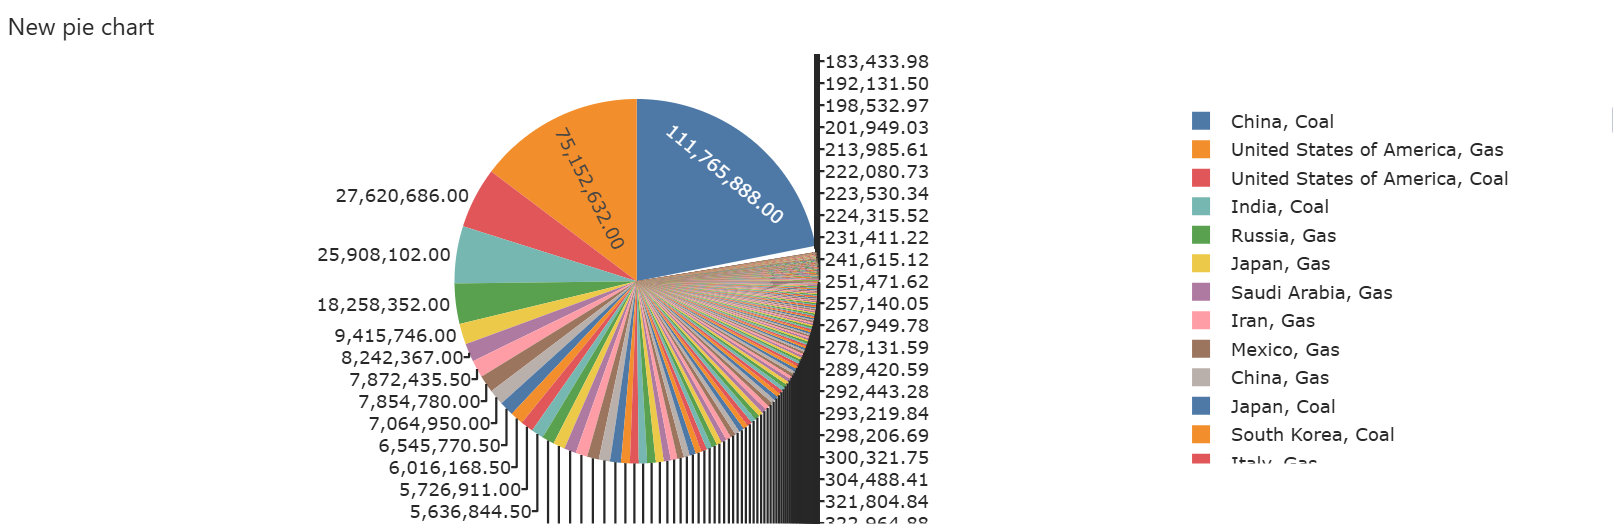

In [30]:
session.widget

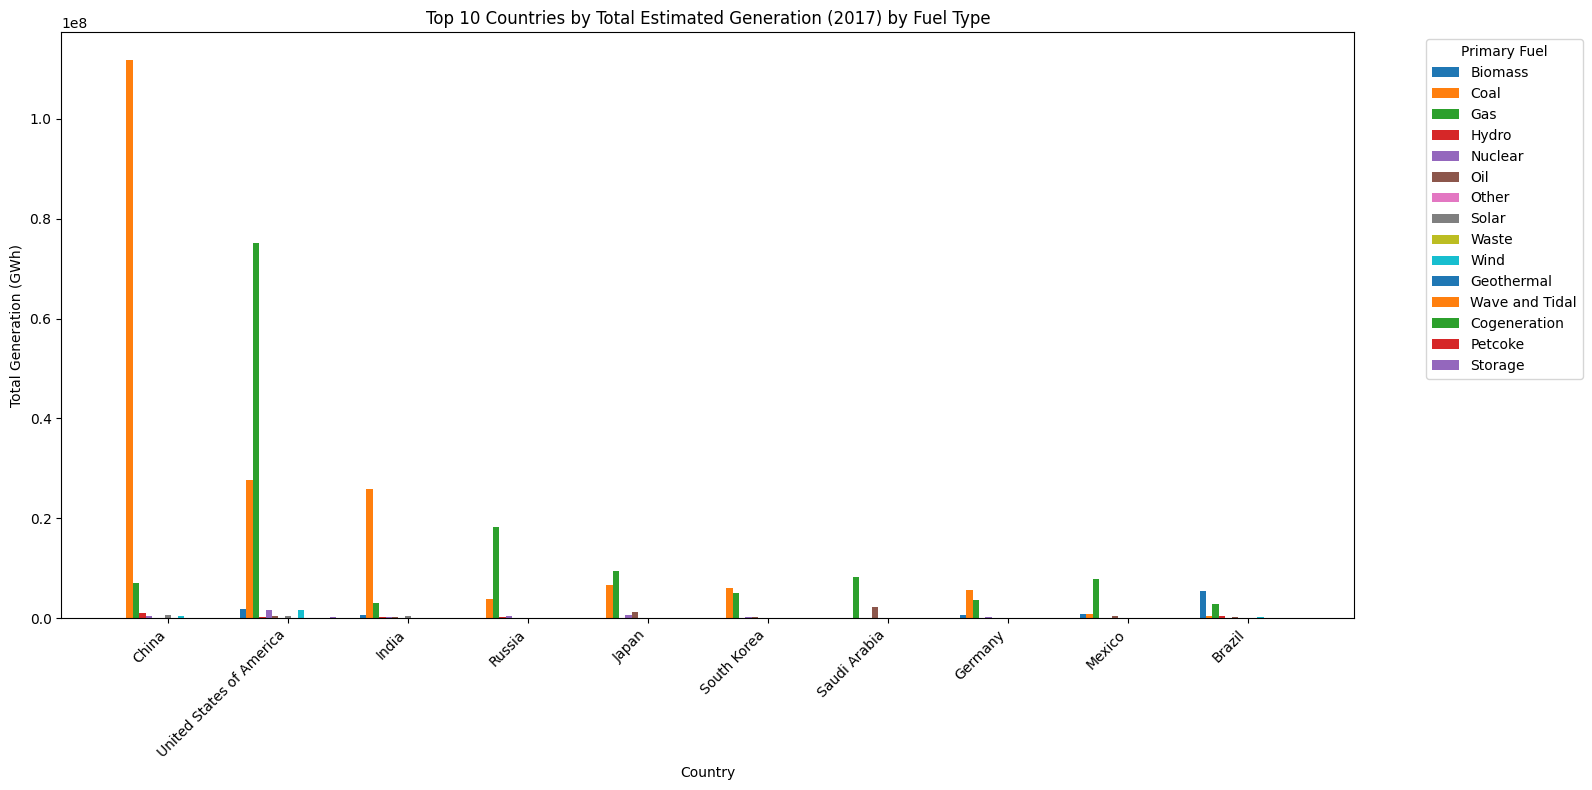

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reset index
result_reset = result.reset_index()

# Hitung total generation per negara
top_countries = (
    result_reset.groupby("country_long")["Total_Generation_2017"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter hanya untuk 10 negara teratas
result_top = result_reset[result_reset["country_long"].isin(top_countries)]

# Pastikan urutan sesuai ranking
countries = top_countries.tolist()
fuels = result_top["primary_fuel"].unique()

# Buat posisi x
x = np.arange(len(countries))
width = 0.8 / len(fuels)

# Plot
plt.figure(figsize=(16, 8))

for i, fuel in enumerate(fuels):
    data = result_top[result_top["primary_fuel"] == fuel]
    generation = [data[data["country_long"] == c]["Total_Generation_2017"].values[0]
                  if c in data["country_long"].values else 0 for c in countries]
    
    plt.bar(x + i * width, generation, width, label=fuel)

# Labeling
plt.xticks(x + width * (len(fuels) - 1) / 2, countries, rotation=45, ha='right')
plt.ylabel("Total Generation (GWh)")
plt.xlabel("Country")
plt.title("Top 10 Countries by Total Estimated Generation (2017) by Fuel Type")
plt.legend(title="Primary Fuel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig("Top 10 Countries by Total Estimated Generation(2017) by Fuel Type.png", bbox_inches='tight', dpi=300);

### Pertanyaan 2

Negara mana yang paling efisien menghasilkan listrik dilihat dari perbandingan estimated generation dan kapasitas, dan menggunakan bahan bakar apa?

In [32]:
m["Total_Generation_2017"] = tt.agg.sum(fact_table["estimated_generation_gwh_2017"])
m["Total_Capacity_GW"] = tt.agg.sum(fact_table["capacity_gw"])
m["Generation_to_Capacity_Ratio"] = m["Total_Generation_2017"] / m["Total_Capacity_GW"]

In [33]:
result = cube.query(
    m["Total_Generation_2017"], m["Total_Capacity_GW"], m["Generation_to_Capacity_Ratio"],
    levels= [ 
        l[("Dim_Country", "country_long", "country_long")],
        l[("Dim_Fuel", "primary_fuel", "primary_fuel")]])
result
result.to_csv("Negara mana yang paling efisien menghasilkan listrik dilihat dari perbandingan estimated generation dan kapasitas, dan menggunakan bahan bakar apa.csv")

Measure ini merepresentasikan seberapa optimal suatu negara memanfaatkan kapasitas pembangkitnya untuk menghasilkan listrik. Nilai yang tinggi menunjukkan bahwa kapasitas yang tersedia digunakan secara efisien untuk pembangkitan energi.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
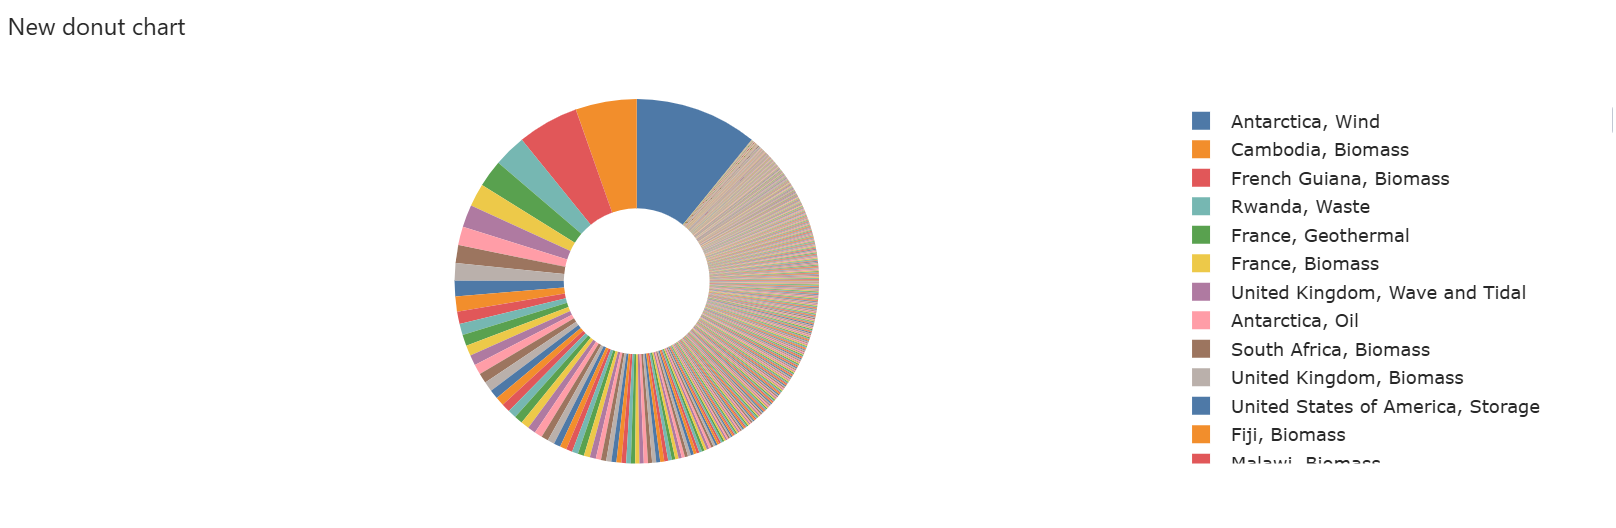

In [34]:
session.widget

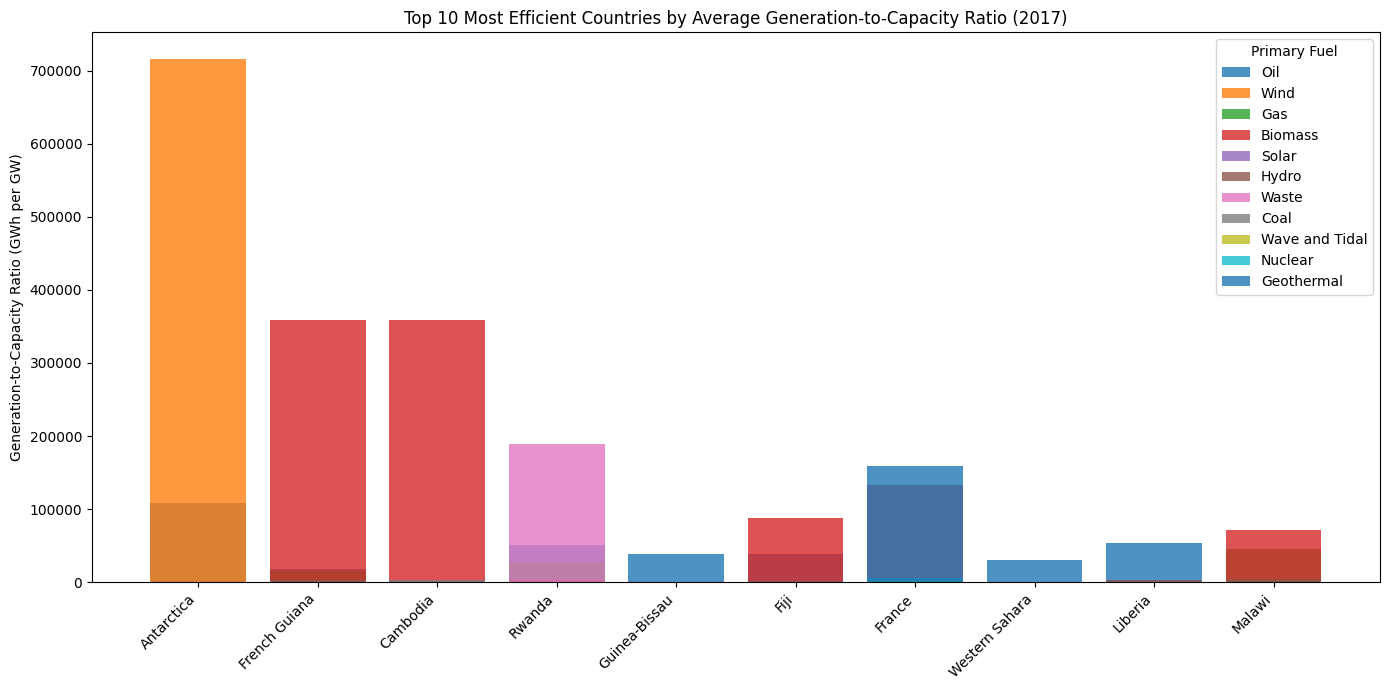

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reset index agar bisa diolah
result_reset = result.reset_index()
# Hitung rata-rata rasio per negara (untuk melihat efisiensi umum tiap negara)
avg_ratio_per_country = (
    result_reset.groupby("country_long")["Generation_to_Capacity_Ratio"]
    .mean()
    .sort_values(ascending=False)
    .head(10))
# Ambil nama-nama negara dengan rasio tertinggi
top_countries = avg_ratio_per_country.index.tolist()
# Filter data hanya untuk negara-negara tersebut
filtered = result_reset[result_reset["country_long"].isin(top_countries)]
# Hitung ulang rata-rata rasio per negara dan fuel
summary = (
    filtered.groupby(["country_long", "primary_fuel"])["Generation_to_Capacity_Ratio"].mean().reset_index())
# Urutkan negara agar tampil rapi di grafik
summary["country_long"] = pd.Categorical(summary["country_long"], categories=top_countries, ordered=True)
summary = summary.sort_values("country_long")
# Buat bar chart
plt.figure(figsize=(14, 7))
fuel_types = summary["primary_fuel"].unique()

for fuel in fuel_types:
    data = summary[summary["primary_fuel"] == fuel]
    plt.bar(data["country_long"], data["Generation_to_Capacity_Ratio"], label=fuel, alpha=0.8)

# Label dan tampilan
plt.ylabel("Generation-to-Capacity Ratio (GWh per GW)")
plt.title("Top 10 Most Efficient Countries by Average Generation-to-Capacity Ratio (2017)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Primary Fuel")
plt.tight_layout()
plt.show()
plt.savefig("Top 10 Most Efficient Countries by Average Generation-to Capacity Ratio(2017)", bbox_inches="tight", dpi=300);

### Pertanyaan 3

Jenis bahan bakar mana yang menunjukkan pertumbuhan tertinggi dalam pembangkitan selama 5 tahun?

In [39]:
# Measure: Total Generation 2013 dan 2017 (sum)
m["Total_Generation_2013"] = tt.agg.sum(fact_table["estimated_generation_gwh_2013"])
m["Total_Generation_2017"] = tt.agg.sum(fact_table["estimated_generation_gwh_2017"])
m["Total_Generation_2016"] = tt.agg.sum(fact_table["estimated_generation_gwh_2016])

SyntaxError: unterminated string literal (detected at line 4) (46478731.py, line 4)

In [40]:
# Measure: Growth Rate (%) selama 5 tahun
m["Generation_Growth_Rate"] = (
    (m["Total_Generation_2017"] - m["Total_Generation_2013"]) / m["Total_Generation_2013"])

IndentationError: unexpected indent (580858166.py, line 3)

In [ ]:
# Query: Group by fuel primary_fuel level
result_growth_by_fuel = cube.query(
    #m["Total_Generation_2013"],
    m["Total_Generation_2016"],
   # m["Generation_Growth_Rate"],
    levels=[l[("Dim_Fuel", "primary_fuel", "primary_fuel")]]).reset_index()
result_growth_by_fuel
#result_growth_by_fuel.to_csv("Jenis bahan bakar mana yang menunjukkan pertumbuhan tertinggi dalam pembangkitan selama 5 tahun.csv")

In [ ]:
session.widget

In [ ]:
import matplotlib.pyplot as plt

# Buat figure
plt.figure(figsize=(12, 6))

# Sumbu X dan Y
fuel_types = result_growth_by_fuel["primary_fuel"]
growth_rates = result_growth_by_fuel["Generation_Growth_Rate"] * 100  # ubah ke persen

# Bar chart
bars = plt.bar(fuel_types, growth_rates, color='skyblue', edgecolor='black')

# Tambahkan label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=9)

# Label dan judul
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Growth Rate (%) dari 2013 ke 2017")
plt.title("Pertumbuhan Pembangkitan Energi Berdasarkan Jenis Bahan Bakar (2013–2017)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# Tampilkan
plt.show()
plt.savefig("Pertumbuhan Pembangkitan Energi Berdasarkan Jenis Bahan Bakar(2013-2017).png", bbox_inches="tight", dpi=300);

### Pertanyaan 4

Jenis bahan bakar apa yang menunjukkan pertumbuhan tertinggi di Indonesia?

In [40]:
result_growth_indonesia = cube.query(
    m["Total_Generation_2013"],
    m["Total_Generation_2017"],
    m["Generation_Growth_Rate"],
    levels=[l[("Dim_Fuel", "primary_fuel", "primary_fuel")]],
    filter=(l[("Dim_Country", "country_long", "country_long")] == "Indonesia")
).sort_values("Generation_Growth_Rate", ascending=False)
result_growth_indonesia
result_growth_indonesia.to_csv("Jenis bahan bakar apa yang menunjukkan pertumbuhan tertinggi di Indonesia.csv")

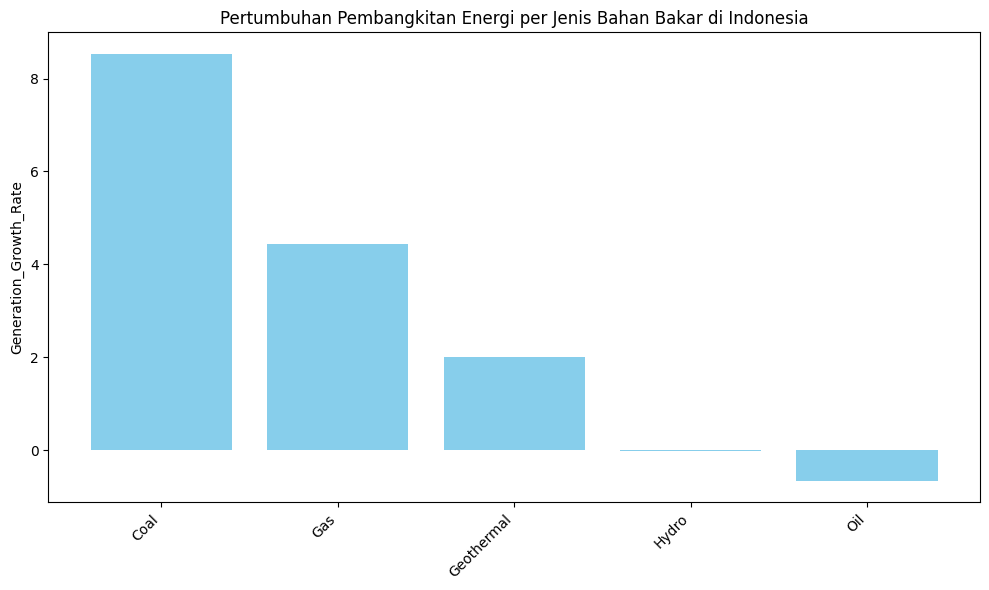

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(result_growth_indonesia.index, result_growth_indonesia["Generation_Growth_Rate"], color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Generation_Growth_Rate")
plt.title("Pertumbuhan Pembangkitan Energi per Jenis Bahan Bakar di Indonesia")
plt.tight_layout()
plt.show()
plt.savefig("Pertumbuhan Pembangkitan Energi per jenis Bahan Bakar di Indonesia.png", bbox_inches="tight", dpi=300);

### Pertanyaan 5

Nama Pembangkit listrik di Indonesia dengan pertumbuhan tercepat selama 5 tahun di Indonesia?

In [42]:
result_growth_by_plant = cube.query(
    m["Total_Generation_2013"],
    m["Total_Generation_2017"],
    m["Generation_Growth_Rate"],
    levels=[
        l[("Dim_PowerPlant", "name", "name")]
    ],
    filter=(l[("Dim_Country", "country_long", "country_long")] == "Indonesia")).sort_values("Generation_Growth_Rate", ascending=False)
result_growth_by_plant
result_growth_by_plant.to_csv("Nama Pembangkit listrik di Indonesia dengan pertumbuhan tercepat selama 5 tahun di Indonesia.csv")

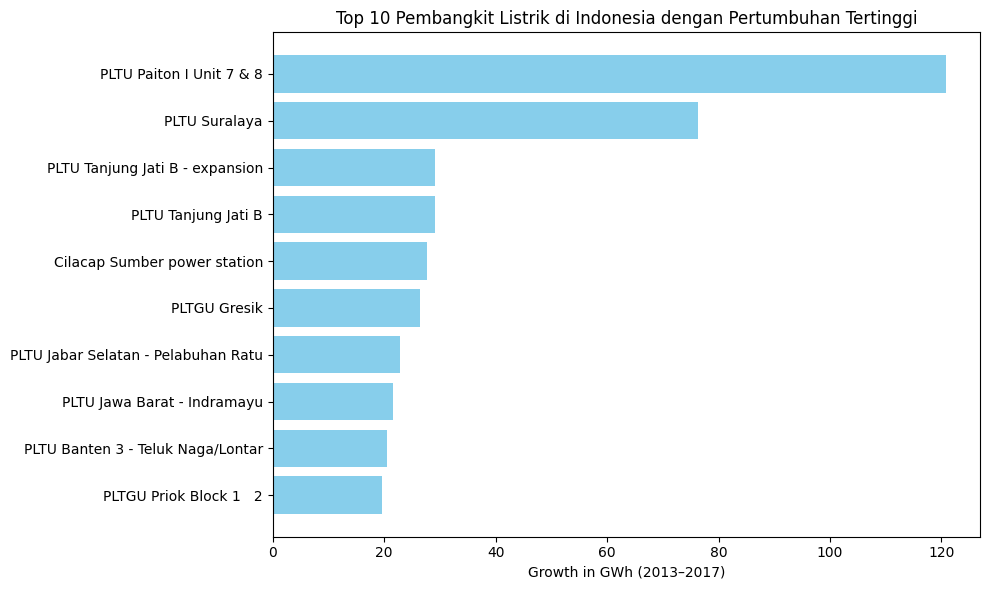

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

top10 = result_growth_by_plant.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10.index.get_level_values("name"), top10["Generation_Growth_Rate"], color="skyblue")
plt.xlabel("Growth in GWh (2013–2017)")
plt.title("Top 10 Pembangkit Listrik di Indonesia dengan Pertumbuhan Tertinggi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
plt.savefig("Top 10 pembagkit Listrik di Indonesia dengan Pertumbuhan TerTertinggi.png", bbox_inches="tight", dpi=300);

pertanyaan 6
Bagaimana perbandingan efisiensi pembangkitan listrik (generation-to-capacity ratio) antara Indonesia dan Vietnam berdasarkan jenis bahan bakar pada tahun 2017?

In [44]:
m["Total_Generation_2017"] = tt.agg.sum(fact_table["estimated_generation_gwh_2017"])
m["Total_Capacity_GW"] = tt.agg.sum(fact_table["capacity_gw"])
m["Generation_to_Capacity_Ratio"] = m["Total_Generation_2017"] / m["Total_Capacity_GW"]

# Kategori efisiensi: tinggi jika rasio > 5000
m["Kategori_Efisiensi"] = tt.where(
    m["Generation_to_Capacity_Ratio"] > 5000,
    "Efisiensi Tinggi",
    "Efisiensi Rendah")

In [47]:
result_ratio_compare = cube.query(
    m["Generation_to_Capacity_Ratio"],
    m["Kategori_Efisiensi"],
    levels=[
        l[("Dim_Country", "country_long", "country_long")],
        l[("Dim_Fuel", "primary_fuel", "primary_fuel")]]).reset_index()

# Filter hanya negara Indonesia dan Vietnam
result_ratio_compare = result_ratio_compare[
    result_ratio_compare["country_long"].isin(["Indonesia", "Vietnam"])]
result_ratio_compare
result_ratio_compare.to_csv("perbandingan efisiensi pembangkitan listrik (generation-to-capacity ratio) antara Indonesia dan Vietnam berdasarkan jenis bahan bakar pada tahun 2017.csv")

,country_long,primary_fuel,Generation_to_Capacity_Ratio,Kategori_Efisiensi
283,Indonesia,Coal,5441.962891,Efisiensi Tinggi
284,Indonesia,Gas,4166.712402,Efisiensi Rendah
285,Indonesia,Geothermal,5338.624512,Efisiensi Tinggi
286,Indonesia,Hydro,3120.794922,Efisiensi Rendah
287,Indonesia,Oil,1805.012817,Efisiensi Rendah
681,Vietnam,Biomass,65131.21875,Efisiensi Tinggi
682,Vietnam,Coal,4979.753418,Efisiensi Rendah
683,Vietnam,Gas,7867.725098,Efisiensi Tinggi
684,Vietnam,Hydro,2586.95166,Efisiensi Rendah
685,Vietnam,Oil,431.748596,Efisiensi Rendah


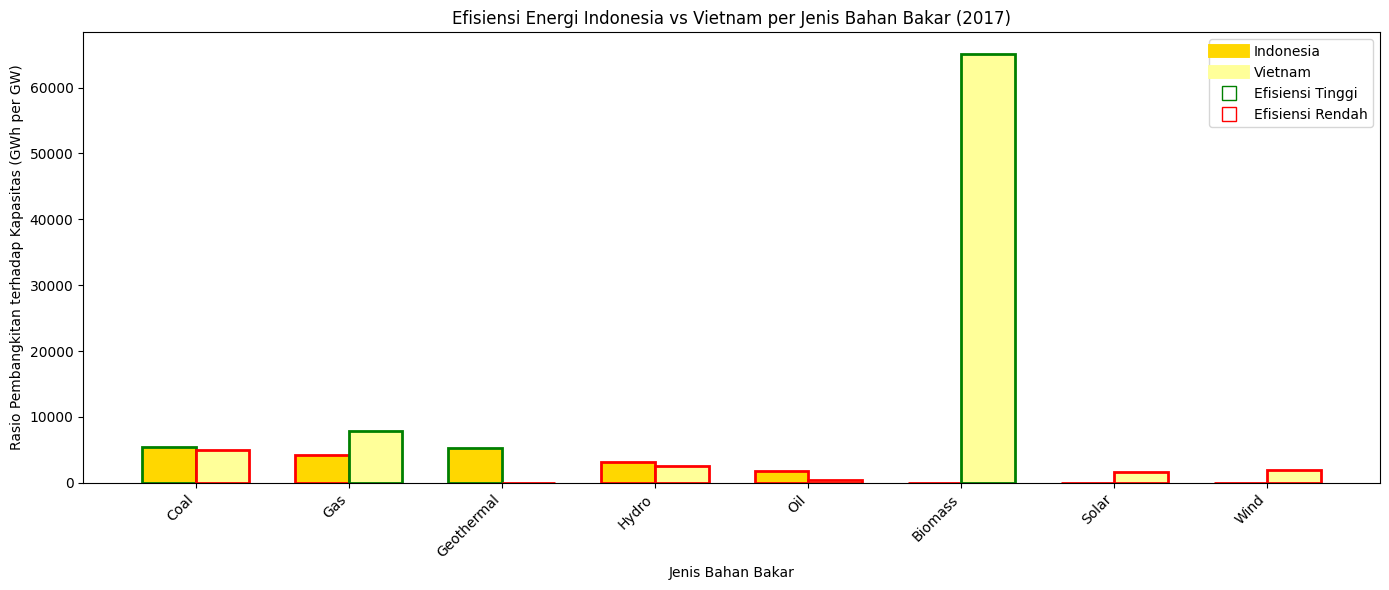

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt

# Setup
countries = result_ratio_compare["country_long"].unique()
fuels = result_ratio_compare["primary_fuel"].unique()
x = range(len(fuels))
width = 0.35

# Warna negara
country_colors = {
    "Indonesia": "#FFD700",# gold
    "Vietnam": "#FFFF99"# light yellow
}

# Edge color berdasarkan efisiensi
eff_edge_colors = {
    "Efisiensi Tinggi": "green",
    "Efisiensi Rendah": "red"}
plt.figure(figsize=(14, 6))

for i, country in enumerate(countries):
    data = result_ratio_compare[result_ratio_compare["country_long"] == country]
    y = [data[data["primary_fuel"] == f]["Generation_to_Capacity_Ratio"].values[0]
         if f in data["primary_fuel"].values else 0 for f in fuels]
    effs = [data[data["primary_fuel"] == f]["Kategori_Efisiensi"].values[0]
            if f in data["primary_fuel"].values else "Efisiensi Rendah" for f in fuels]
    
    bar_positions = [xi + i * width for xi in x]
    
    # Buat bar satu per satu agar edge color bisa beda
    for xpos, height, eff in zip(bar_positions, y, effs):
        plt.bar(xpos, height,
                width=width,
                color=country_colors[country],
                edgecolor=eff_edge_colors[eff],
                linewidth=2)

# Label dan tata letak
plt.xticks([xi + width / 2 for xi in x], fuels, rotation=45, ha="right")
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Rasio Pembangkitan terhadap Kapasitas (GWh per GW)")
plt.title("Efisiensi Energi Indonesia vs Vietnam per Jenis Bahan Bakar (2017)")
custom_legend = [
    plt.Line2D([0], [0], color="gold", lw=10, label="Indonesia"),
    plt.Line2D([0], [0], color="#FFFF99", lw=10, label="Vietnam"),
    plt.Line2D([0], [0], color="white", marker='s', markerfacecolor='white', 
               markeredgecolor='green', label="Efisiensi Tinggi", markersize=10),
    plt.Line2D([0], [0], color="white", marker='s', markerfacecolor='white', 
               markeredgecolor='red', label="Efisiensi Rendah", markersize=10)]
plt.legend(handles=custom_legend)
plt.tight_layout()
plt.show()
plt.savefig("Efisiensi Energi Indonesia vs Vietnam per Jenis Bahan Bakar 2017.png", bbox_inches="tight", dpi=300);